# < 3주차 과제 1 : MLP 마음대로 다뤄보기>
- dataset을 임의로 선정해서 직접 분석 해보기(제공한 코드를 활용해서 해보기)
- activation functions 중 relu사용시 함수 직접 정의
- lr, optimizer 등 바꿔보기
- hidden layer/neuron 수를 바꾸기
- 전처리도 추가
- 모든 시도를 올려주세요!
- 제일 높은 acc를 보인 시도를 명시해주세요!


In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_wine
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 아래 데이터셋 중 원하는 데이터셋 하나를 선택하여, 코드 과제 진행하기!
- 1) load_digits() <br>
- 2) load_wine()

In [ ]:
# 데이터셋 종류 : load_wine()
data = load_wine()

In [ ]:
import pandas as pd
import numpy as np
# 와인 데이터를 로드한다.
wine = load_wine()
# 와인 데이터에서 feature 로 되어있는 데이터를 갖고 온다.
wine_data = data.data
# 와인 데이터에서 target 데이터를 갖고온다.
wine_target = data.target
# wine 데이터의 feature, target로 Dataframe을 만든다.
df_wine = pd.DataFrame(data = wine_data, columns=[wine.feature_names])
# feature 만 있는 데이터 프레임에 타겟 데이터를 추가한다.
df_wine['target'] = wine.target
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [ ]:
cor = df_wine.corr()
#Correlation with output variable
cor_target = abs(cor["target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

,target
alcohol,0.328222
malic_acid,0.437776
ash,NaN
alcalinity_of_ash,0.517859
magnesium,NaN
total_phenols,0.719163
flavanoids,0.847498
nonflavanoid_phenols,0.489109
proanthocyanins,0.499130
color_intensity,NaN


In [ ]:
features = ["alcohol", "malic_acid", "alcalinity_of_ash", "total_phenols", "flavanoids",
            "nonflavanoid_phenols", "proanthocyanins", "hue", "od280/od315_of_diluted_wines", "proline"]

In [ ]:
X=df_wine[features].copy()


In [ ]:
Y=np.array(np.transpose([df_wine["target"]]))


In [ ]:
Y = Y.reshape(Y.shape[1:])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [ ]:
y_train = torch.LongTensor(y_train).to(device)
y_test = torch.LongTensor(y_test)

In [ ]:
x_train = torch.FloatTensor(x_train.values).to(device)
x_test = torch.FloatTensor(x_test.values).to(device)

In [ ]:
print(x_train[0])
print(y_train[0])
#input 10개 (속성이 10개)
#y의 class는 3개 (0,1,2)

tensor([1.3750e+01, 1.7300e+00, 1.6000e+01, 2.6000e+00, 2.7600e+00, 2.9000e-01,
        1.8100e+00, 1.1500e+00, 2.9000e+00, 1.3200e+03], device='cuda:0')
tensor([0], device='cuda:0')


파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것
- init : class 에서 객체가 생성되면 바로 실행되는 함수
- len : observation 수를 정의하는 함수
- getitem : iteration 마다 해당하는 데이터를 돌려주는 함수

In [ ]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [ ]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size) 

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# 1. Feature select + Adam(lr=0.001) + RReLU

**accuracy는 0.9814814814814815** 가장 높습니다. 


In [ ]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기 : 3개 유지

model = nn.Sequential(
          nn.Linear(10,256, bias=True), 
          nn.RReLU(),
          nn.Linear(256,128, bias=True),
          nn.RReLU(),
          nn.Linear(128,36, bias=True), 
          nn.RReLU()
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [ ]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(10,256, bias=True), # input_layer = 13, hidden_layer1 = 12 
          nn.RReLU(),
        nn.BatchNorm1d(256)
    )
  # activation function 이용 
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함 
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨 
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨 

    self.layer2 = nn.Sequential(
          nn.Linear(256,128, bias=True), # hidden_layer1 = 350, hidden_layer2 = 150
        nn.RReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(128,64, bias=True), # hidden_layer1 = 150, hidden_layer2 = 75
        nn.RReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(64, 36, bias=True), # hidden_layer3 = 75, output_layer = 30
        nn.RReLU()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [ ]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [ ]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-21-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=10, out_features=256, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer4): Sequential(
    (0): Linear(in_features=64, out_features=36, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
)

In [ ]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=10, out_features=256, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer4): Sequential(
    (0): Linear(in_features=64, out_features=36, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
)


In [ ]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr=0.01)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [ ]:
print(x_test.dtype)
print(y_test.dtype)
print(x_train.dtype)
print(y_train.dtype)

torch.float32
torch.int64
torch.float32
torch.int64


In [ ]:
y_train = y_train.squeeze(dim=-1)
y_test = y_test.squeeze(dim=-1)

In [ ]:
x_train= x_train.cuda()
y_train= y_train.cuda()

x_test= x_test.cuda()
y_test= y_test.cuda()

In [ ]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 3.7463982105255127
10 0.6532345414161682
20 0.2599734663963318
30 0.10704813152551651
40 0.06005473807454109
50 0.03031962364912033
60 0.017163757234811783
70 0.22155781090259552
80 0.06357238441705704
90 0.031755294650793076


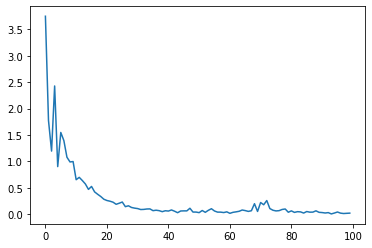

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
x_test = torch.as_tensor(x_test, device='cpu')
y_test = torch.as_tensor(y_test, device='cpu')


In [ ]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy =  accuracy_score(predicted, y_test)


In [ ]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [17.691502   11.575553   -0.35722    -0.35137564 -1.9531349  -1.5158234
 -2.5837598  -1.4760795  -2.796125   -1.6565622  -1.1555773  -2.0777953
 -0.67933327 -2.7128172  -3.0725865  -0.7806823  -1.5800152  -1.3364215
 -1.0446081  -0.8056989  -2.0922585  -2.861981   -2.16978    -3.0564768
 -0.6995384  -0.6282867  -2.9079661  -2.8325794  -0.7925621  -1.7106091
 -1.303392   -1.9771311  -3.627912   -1.5860152  -0.73021203 -1.8501127 ]
argmax를 한 후의 output은 0
accuracy는 0.9814814814814815


#2.   feature 전체 + 위와 동일

In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_wine
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 아래 데이터셋 중 원하는 데이터셋 하나를 선택하여, 코드 과제 진행하기!
- 1) load_digits() <br>
- 2) load_wine()

In [ ]:
# 데이터셋 종류 : load_wine()
data = load_wine()

In [ ]:
input = data.data
output = data.target

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문 

In [ ]:
print(x_train[0])
print(y_train[0])

#input 13개 (속성이 13개)
#y의 class는 3개 (0,1,2)

tensor([1.3750e+01, 1.7300e+00, 2.4100e+00, 1.6000e+01, 8.9000e+01, 2.6000e+00,
        2.7600e+00, 2.9000e-01, 1.8100e+00, 5.6000e+00, 1.1500e+00, 2.9000e+00,
        1.3200e+03], device='cuda:0')
tensor(0, device='cuda:0')


파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것
- init : class 에서 객체가 생성되면 바로 실행되는 함수
- len : observation 수를 정의하는 함수
- getitem : iteration 마다 해당하는 데이터를 돌려주는 함수

In [ ]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [ ]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size) 

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [ ]:
class RReLU(Module):
  __constants__ = ['lower', 'upper', 'inplace']
  lower: float
  upper: float
  inplace: bool

  def __init__(
      self,
      lower: float = 1. / 8,
      upper: float = 1. / 3,
      inplace: bool = False
    ):
      super(RReLU, self).__init__()
      self.lower = lower
      self.upper = upper
      self.inplace = inplace

  def forward(self, input: Tensor) -> Tensor:
    return F.rrelu(input, self.lower, self.upper, self.training, self.inplace)

  def extra_repr(self):
    inplace_str = ', inplace=True' if self.inplace else ''
    return 'lower={}, upper={}{}'.format(self.lower, self.upper, inplace_str)

In [ ]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기 : 3개 유지

model = nn.Sequential(
          nn.Linear(13,350, bias=True), 
          nn.RReLU(),
          nn.Linear(350,150, bias=True),
          nn.RReLU(),
          nn.Linear(150,30, bias=True), 
          nn.RReLU()
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [ ]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,350, bias=True), # input_layer = 13, hidden_layer1 = 12 
          nn.RReLU(),
        nn.BatchNorm1d(350)
    )
  # activation function 이용 
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함 
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨 
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨 

    self.layer2 = nn.Sequential(
          nn.Linear(350,150, bias=True), # hidden_layer1 = 350, hidden_layer2 = 150
        nn.RReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(150,75, bias=True), # hidden_layer1 = 150, hidden_layer2 = 75
        nn.RReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(75, 30, bias=True), # hidden_layer3 = 75, output_layer = 30
        nn.RReLU()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [ ]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [ ]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-29-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=350, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): BatchNorm1d(350, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=350, out_features=150, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer3): Sequential(
    (0): Linear(in_features=150, out_features=75, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer4): Sequential(
    (0): Linear(in_features=75, out_features=30, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
)

In [ ]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=350, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): BatchNorm1d(350, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=350, out_features=150, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer3): Sequential(
    (0): Linear(in_features=150, out_features=75, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer4): Sequential(
    (0): Linear(in_features=75, out_features=30, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
)


In [ ]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr=0.001)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [ ]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 3.3504011631011963
10 0.8808708786964417
20 0.5184575915336609
30 0.30097827315330505
40 0.16836565732955933
50 0.13413451611995697
60 0.08501000702381134
70 0.06689401715993881
80 0.03310514986515045
90 0.021457815542817116
100 0.01280921045690775
110 0.008012808859348297
120 0.00548522686585784
130 0.0033892798237502575
140 0.002701552351936698
150 0.002371857175603509
160 0.0023148679174482822
170 0.0013816292630508542
180 0.0012911115773022175
190 0.0014445430133491755


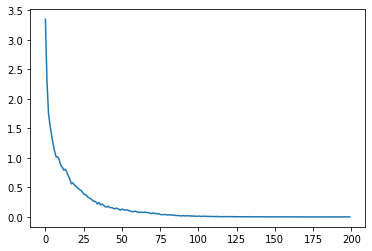

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [ ]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [21.563154   11.621655    5.926069    2.130214   -0.69305825  0.93218005
  0.20242207 -1.9709882  -2.2320395  -0.8009921  -0.3392468  -1.1256614
 -2.3909318  -2.1406348  -1.2092605  -2.588373    0.04536498 -0.5068919
 -0.7295945  -0.9330033   2.1465352  -2.1362743  -0.04718647 -0.59722656
 -0.27687445 -0.27275327 -1.2749738  -0.9135397  -0.95953053 -2.0820904 ]
argmax를 한 후의 output은 0
accuracy는 0.9629629629629629


# 3. Feature select(cor>0.4) + Adam(lr=0.001) + tanh

**accuracy는 1.0 ** 가장 높습니다. 


In [ ]:
# 데이터셋 종류 : load_wine()
data = load_wine()

In [ ]:
import pandas as pd
import numpy as np
# 와인 데이터를 로드한다.
wine = load_wine()
# 와인 데이터에서 feature 로 되어있는 데이터를 갖고 온다.
wine_data = data.data
# 와인 데이터에서 target 데이터를 갖고온다.
wine_target = data.target
# wine 데이터의 feature, target로 Dataframe을 만든다.
df_wine = pd.DataFrame(data = wine_data, columns=[wine.feature_names])
# feature 만 있는 데이터 프레임에 타겟 데이터를 추가한다.
df_wine['target'] = wine.target

In [ ]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [ ]:
cor = df_wine.corr()
#Correlation with output variable
cor_target = abs(cor["target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

,target
alcohol,NaN
malic_acid,0.437776
ash,NaN
alcalinity_of_ash,0.517859
magnesium,NaN
total_phenols,0.719163
flavanoids,0.847498
nonflavanoid_phenols,0.489109
proanthocyanins,0.499130
color_intensity,NaN


In [ ]:
features = ["malic_acid", "alcalinity_of_ash", "total_phenols", "flavanoids",
            "nonflavanoid_phenols", "proanthocyanins", "hue", "od280/od315_of_diluted_wines", "proline"]

In [ ]:
X=df_wine[features].copy()


In [ ]:
Y=np.array(np.transpose([df_wine["target"]]))


In [ ]:
Y = Y.reshape(Y.shape[1:])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [ ]:
y_train = torch.LongTensor(y_train).to(device)
y_test = torch.LongTensor(y_test)

In [ ]:
x_train = torch.FloatTensor(x_train.values).to(device)
x_test = torch.FloatTensor(x_test.values).to(device)

In [ ]:
print(x_train[0])
print(y_train[0])
#input 9개 (속성이 9개)
#y의 class는 3개 (0,1,2)

tensor([1.7300e+00, 1.6000e+01, 2.6000e+00, 2.7600e+00, 2.9000e-01, 1.8100e+00,
        1.1500e+00, 2.9000e+00, 1.3200e+03], device='cuda:0')
tensor([0], device='cuda:0')


파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것
- init : class 에서 객체가 생성되면 바로 실행되는 함수
- len : observation 수를 정의하는 함수
- getitem : iteration 마다 해당하는 데이터를 돌려주는 함수

In [ ]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [ ]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size) 

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [ ]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기 : 3개 유지

model = nn.Sequential(
          nn.Linear(9,512, bias=True), 
          nn.tanh(),
          nn.Linear(512,256, bias=True),
          nn.tanh(),
          nn.Linear(256,128, bias=True),
          nn.tanh(),
          nn.Linear(128,36, bias=True), 
          nn.tanh()
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [ ]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(9,512, bias=True), # input_layer = 9, hidden_layer1 = 512 
          nn.RReLU(),
        nn.BatchNorm1d(512)
    )
  # activation function 이용 
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함 
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨 
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨 

    self.layer2 = nn.Sequential(
          nn.Linear(512,256, bias=True), # hidden_layer1 = 350, hidden_layer2 = 150
        nn.RReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(256,128, bias=True), # hidden_layer1 = 150, hidden_layer2 = 75
        nn.RReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(128, 64, bias=True), # hidden_layer3 = 75, output_layer = 30
        nn.RReLU()
    )
    self.layer5 = nn.Sequential(
        nn.Linear(64, 36, bias=True), # hidden_layer3 = 75, output_layer = 30
        nn.RReLU()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    output = self.layer5(output)
    return output

In [ ]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [ ]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-103-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=9, out_features=256, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer4): Sequential(
    (0): Linear(in_features=64, out_features=36, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
)

In [ ]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=9, out_features=256, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer4): Sequential(
    (0): Linear(in_features=64, out_features=36, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
)


In [ ]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr=0.001)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [ ]:
print(x_test.dtype)
print(y_test.dtype)
print(x_train.dtype)
print(y_train.dtype)

torch.float32
torch.int64
torch.float32
torch.int64


In [ ]:
y_train = y_train.squeeze(dim=-1)
y_test = y_test.squeeze(dim=-1)

In [ ]:
x_train= x_train.cuda()
y_train= y_train.cuda()

x_test= x_test.cuda()
y_test= y_test.cuda()

In [ ]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 3.811213254928589
10 1.2016456127166748
20 0.8563257455825806
30 0.6610510945320129
40 0.42307332158088684
50 0.3400321304798126
60 0.18983396887779236
70 0.1260484755039215
80 0.07022875547409058
90 0.06429146975278854


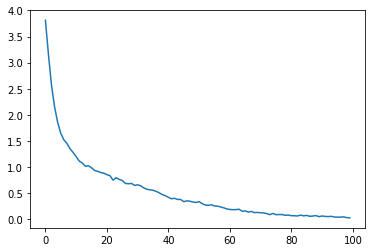

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
x_test = torch.as_tensor(x_test, device='cpu')
y_test = torch.as_tensor(y_test, device='cpu')

In [ ]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy =  accuracy_score(predicted, y_test)


In [ ]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [21.543148   16.901724   -0.74689656 -0.5457106  -1.595903    0.22990376
 -3.2073927  -0.2119604  -2.5410326  -1.2824352  -3.1997986  -1.5430114
 -0.40539256 -0.5256041  -2.5221548  -1.3497123  -0.06214226 -0.589889
  1.4996643  -0.8925893  -0.7344888  -0.62149924 -0.5368596  -1.069954
 -0.56833124 -0.7323237  -1.8687415  -3.1838608  -0.24095626 -0.7730151
 -2.6356423  -2.4238708  -0.58906    -2.9498148  -0.6526307  -1.1352663 ]
argmax를 한 후의 output은 0
accuracy는 1.0


# < 3주차 과제 2 : CNN 맛보기>

In [1]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [3]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [10]:
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
      self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
      self.mp = nn.MaxPool2d(2)
      self.fc = nn.Linear(320, 10) ### : 알맞는 input은?
    
    def forward(self, x):
      in_size = x.size(0)
      x = F.relu(self.mp(self.conv1(x)))
      x = F.relu(self.mp(self.conv2(x)))
      x = x.view(in_size, -1)
      x = self.fc(x)
      return F.log_softmax(x)

In [11]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [12]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [13]:
def test():
    model.eval() #model.eval() 의 기능은?
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [14]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-10-b34e77e3662d>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.295771
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.298887
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.265930
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.250211
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.223204
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.192784
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.135209
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.068318
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.977800
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.896162
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.588422
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.272797
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.223005
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.855509
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.784181
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.834800
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.792371
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.507975
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.612564
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.621625
Train Epoch: 1 [12800/60000 (

<ipython-input-13-f52337105c2a>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1805, Accuracy: 9485/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.359348
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.135230
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.220182
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.277170
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.113828
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.222347
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.257903
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.176339
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.189104
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.135419
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.306152
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.302284
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.182783
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.214288
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.108183
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.198163
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.075706
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.180417
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.141696
Train Epoch: 2 [12